# First exercise

In [3]:
from sklearn.datasets import make_moons

# Make 1000 examples
n_samples = 1000
# Create
X, y = make_moons(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [2]:
# Check out features
X

array([[-0.00933187,  0.39098105],
       [ 0.95457387, -0.47375583],
       [ 0.9185256 , -0.42519648],
       ...,
       [ 1.65391483, -0.29179795],
       [-0.9341017 ,  0.35358221],
       [ 0.7968358 ,  0.60423662]])

In [3]:
# Change the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
...,...,...,...
995,0.793018,0.591402,0
996,-0.138777,0.968000,0
997,1.653915,-0.291798,1
998,-0.934102,0.353582,0


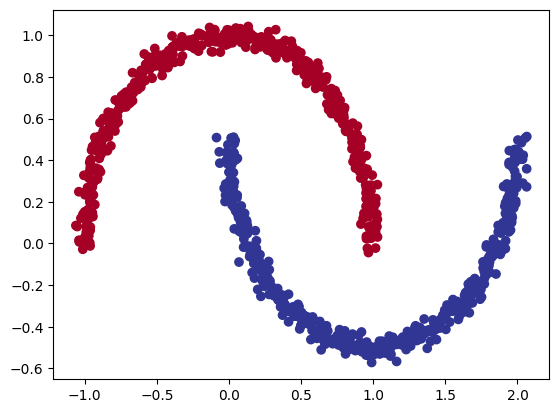

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [6]:
# Check the shapes of features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([-0.00933187,  0.39098105]), 1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1000, 800, 200)

In [7]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model

history_1 = model_1.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6313 - accuracy: 0.4975
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6028 - accuracy: 0.4563
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.6562
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.7237
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5386 - accuracy: 0.7825
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.8125
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.8213
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.8225
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.8288
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8325
Epoch 11/25
25/25 [

In [8]:
# Evaluate model 10 on the test dataset
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.2847 - accuracy: 0.8600


[0.2846609055995941, 0.8600000143051147]

In [9]:
import numpy as np

In [10]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we.ve going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multuclass classification")

    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha= 0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


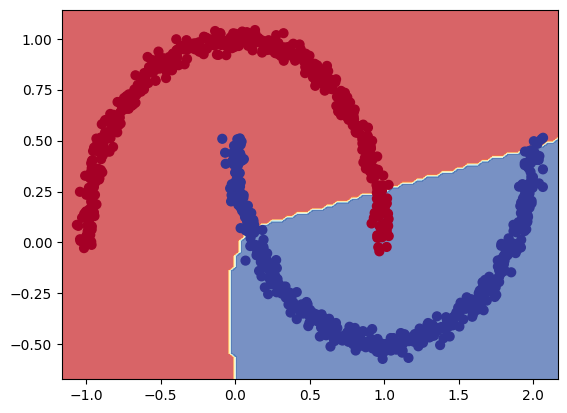

In [20]:
plot_decision_boundary(model=model_1,
                       X=X,
                       y=y)

Text(0.5, 1.0, 'Model_1 loss curves')

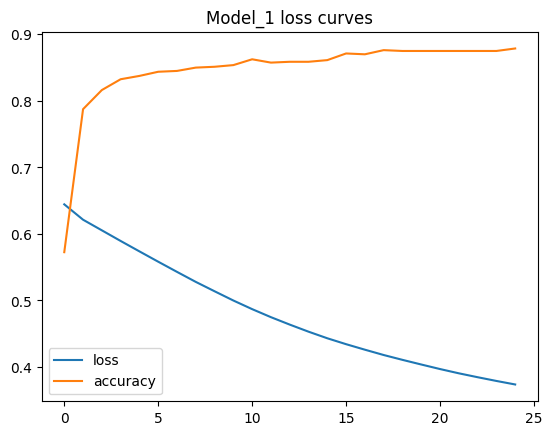

In [22]:
# Plot the loss curves
pd.DataFrame(history_1.history).plot()
plt.title("Model_1 loss curves")

In [11]:
# Set the random seed
tf.random.set_seed(42)

# Create a model (same as model_1)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

# Fit the model
history_2 = model_2.fit(X_train,
                        y_train,
                        epochs = 100,
                        callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6900 - accuracy: 0.4300 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.4338 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.4437 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.4613 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.4675 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.4675 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.4800 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.4938 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

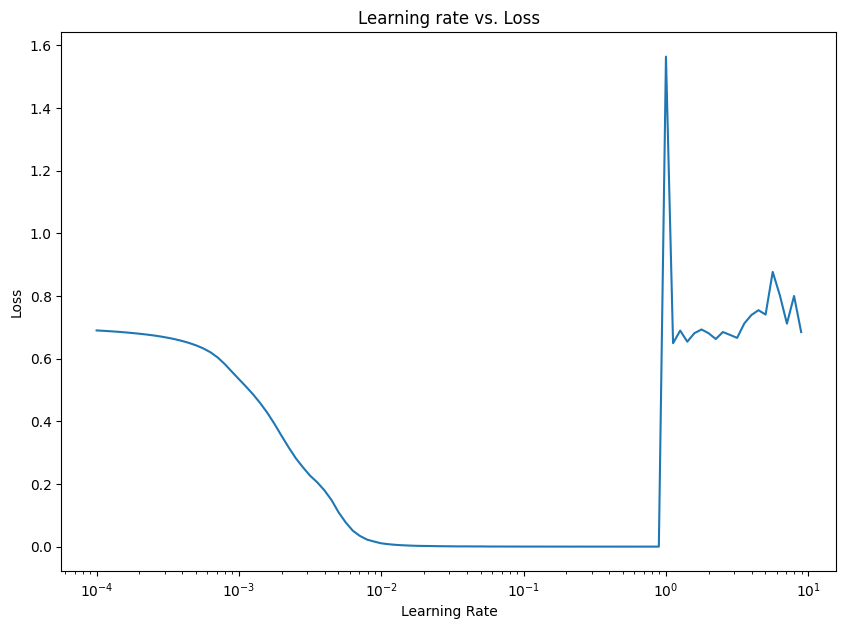

In [12]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_2.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [13]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0015),
                metrics=["accuracy"])

# 3. Fit the model

history_3 = model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6752 - accuracy: 0.7325
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.7175
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6470 - accuracy: 0.7212
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.7225
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.7237
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5938 - accuracy: 0.7362
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.7475
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5487 - accuracy: 0.7613
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5233 - accuracy: 0.7862
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.8087
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


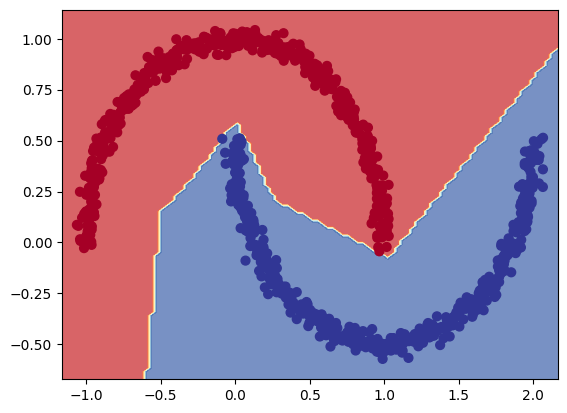

In [14]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [15]:
y_test

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1])

In [16]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_3.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 3ms/step


ValueError: ignored

In [39]:
y_preds

array([[9.88794327e-01],
       [1.23633832e-01],
       [9.94865596e-01],
       [8.05552900e-02],
       [9.51814055e-01],
       [8.90680850e-01],
       [6.48768961e-01],
       [8.52588117e-01],
       [9.96854424e-01],
       [1.35568187e-01],
       [8.05552900e-02],
       [9.86235678e-01],
       [7.43327260e-01],
       [9.95950639e-01],
       [2.36522593e-03],
       [4.80086476e-01],
       [9.08532202e-01],
       [6.58988953e-02],
       [9.92575347e-01],
       [4.41396348e-02],
       [1.18745022e-01],
       [7.48617388e-03],
       [9.93810356e-01],
       [3.86928432e-02],
       [4.34094042e-01],
       [7.73581266e-01],
       [1.76067624e-04],
       [5.16593223e-04],
       [1.98081089e-03],
       [9.89301801e-01],
       [7.07075894e-01],
       [3.64789546e-01],
       [9.56652611e-02],
       [9.77872968e-01],
       [8.05552900e-02],
       [9.53375459e-01],
       [9.73554254e-01],
       [9.93295252e-01],
       [9.87813294e-01],
       [9.93190229e-01],


In [40]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[84, 16],
       [ 8, 92]])

In [17]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

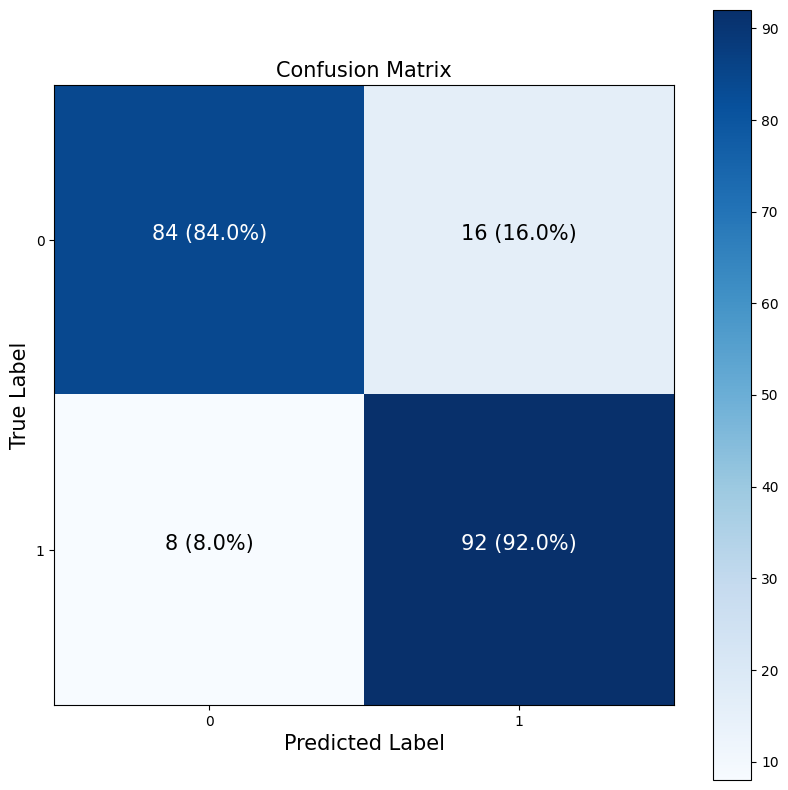

In [53]:
make_confusion_matrix(y_true=y_test,
                      y_pred=tf.round(y_preds))

# Second exercise

In [18]:
import tensorflow  as tf
from tensorflow.keras.datasets import fashion_mnist

# Th data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [19]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

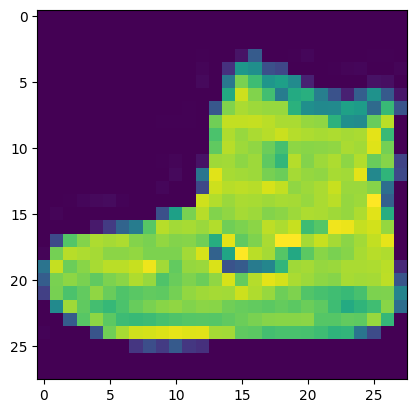

In [20]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [57]:
train_data, train_labels

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [22]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [24]:
# Set random seed
tf.random.set_seed(42)

# Create a model

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

# Fit the model
norm_history = model_4.fit(train_data_norm,
                            tf.one_hot(train_labels, depth=10),
                            epochs=50,
                            validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/50
1875/1875 [==============================] - 17s 8ms/step - loss: 0.6635 - accuracy: 0.7709 - val_loss: 72.8650 - val_accuracy: 0.8020
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4583 - accuracy: 0.8382 - val_loss: 98.5975 - val_accuracy: 0.7852
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4261 - accuracy: 0.8489 - val_loss: 81.6567 - val_accuracy: 0.7889
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4083 - accuracy: 0.8565 - val_loss: 89.5601 - val_accuracy: 0.7841
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3962 - accuracy: 0.8611 - val_loss: 114.1727 - val_accuracy: 0.7530
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3869 - accuracy: 0.8628 - val_loss: 95.6287 - val_accuracy: 0.7768
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3807 - accuracy: 0.8662 - val_loss: 72.1820 - val_

In [34]:
y_probs = model_4.predict(test_data_norm)

313/313 [==============================] - 2s 7ms/step


In [35]:
# Convert all of the predictions probabilities inot integers
y_preds= y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [36]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[785,   6,  11,  64,   5,   1, 115,   0,  13,   0],
       [  0, 952,   1,  36,   5,   0,   4,   0,   2,   0],
       [ 11,   2, 632,  27, 199,   0, 125,   0,   4,   0],
       [ 16,   8,   8, 895,  37,   2,  29,   0,   5,   0],
       [  0,   1,  56,  42, 813,   1,  84,   0,   3,   0],
       [  0,   1,   0,   0,   0, 918,   0,  42,   8,  31],
       [118,   2,  66,  54,  88,   1, 656,   0,  15,   0],
       [  0,   0,   0,   0,   0,  26,   0, 950,   0,  24],
       [  5,   0,   6,  10,   8,   4,  16,   7, 942,   2],
       [  0,   0,   0,   0,   0,   8,   1,  39,   1, 951]])

In [39]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

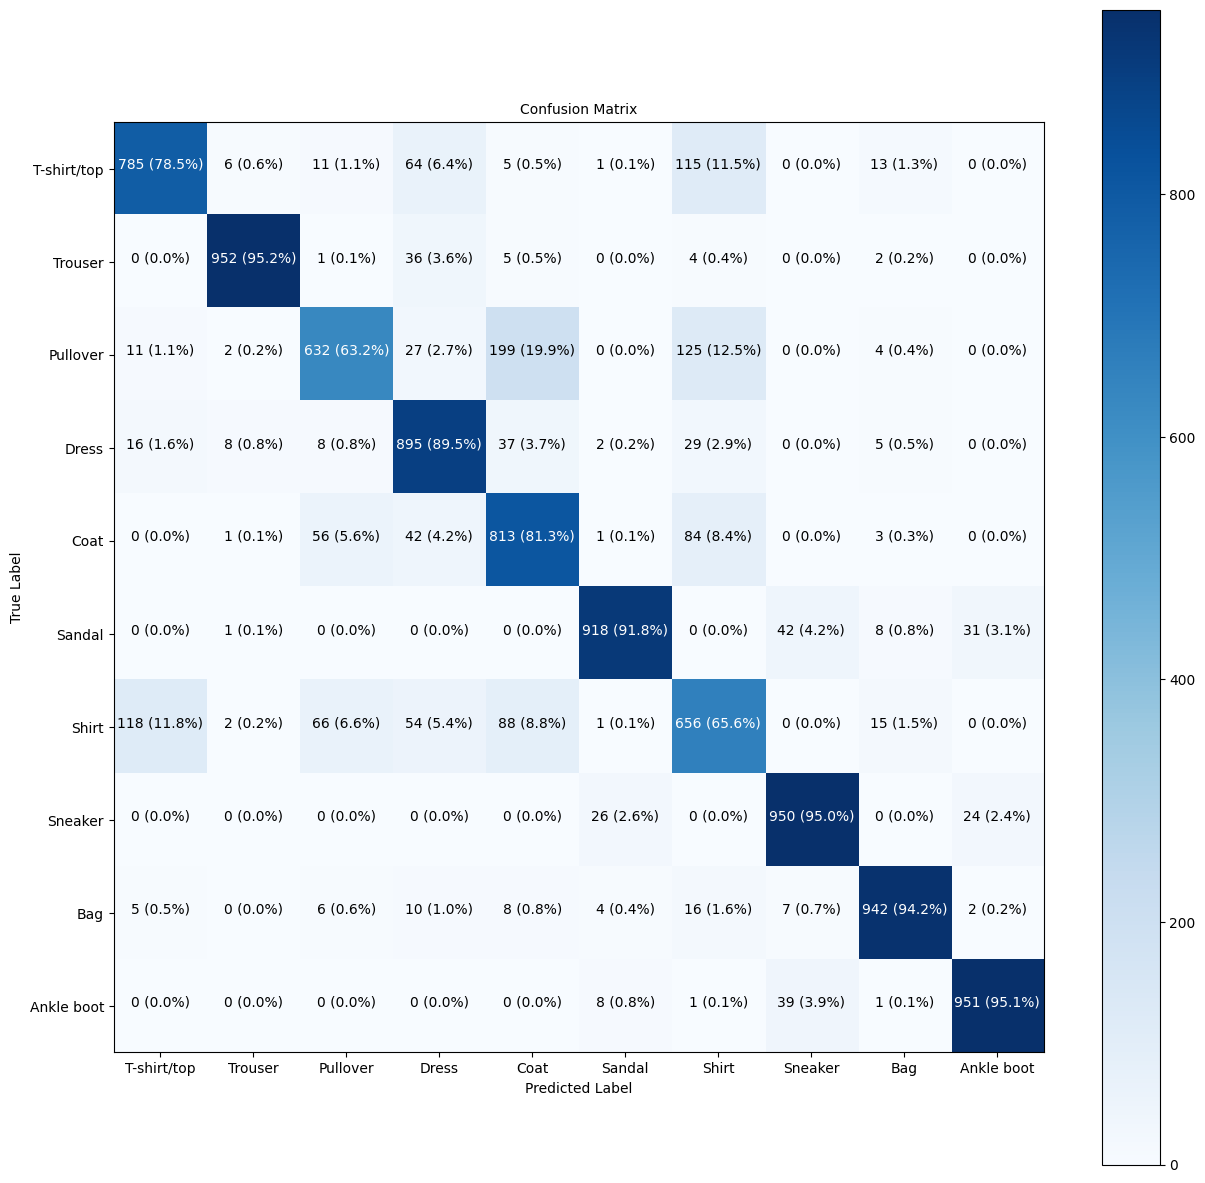

In [40]:
# Make a p
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

In [63]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  num_images = 3

  for i in range(num_images):
    # Set up random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color = color) # set the color to green or red based on if prediction is right or wrong
    plt.show()

1/1 [==============================] - 0s 31ms/step


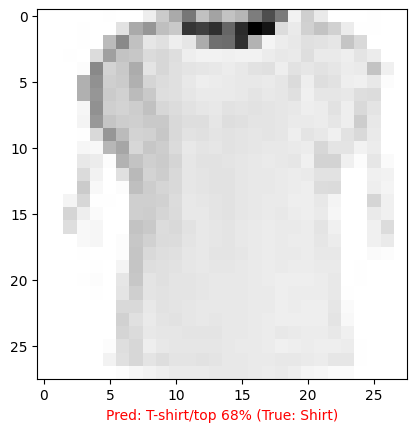

1/1 [==============================] - 0s 27ms/step


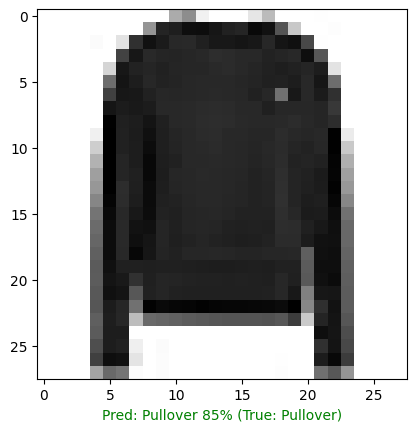

1/1 [==============================] - 0s 24ms/step


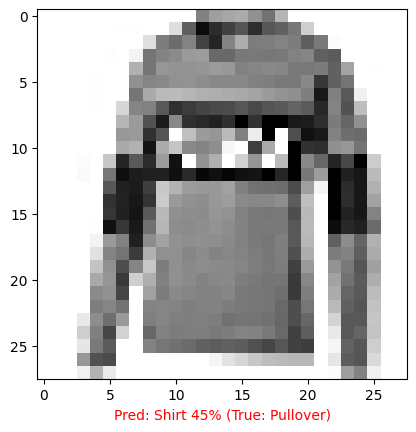

In [64]:
# Check out a random image as well as its prediction
plot_random_image(model=model_4,
                  images=test_data_norm, # always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)